<a href="https://colab.research.google.com/github/h20190539/h20190539/blob/master/March.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

%matplotlib inline

In [ ]:
# Importing Training Set
dataset_train = pd.read_csv('/content/March.csv')

# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:4]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['Year '])
datelist_train = [dt.datetime.strptime(date, '%b-%y').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (360, 3)
All timestamps == 360
Featured selected: ['Noise', 'Frequency(hz)']


In [ ]:
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')

dataset_train = dataset_train.astype(float)

# Using multiple features (predictors)
training_set = dataset_train.to_numpy()
print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (360, 2).


array([[9.79704718e+01, 9.84300000e+00],
       [1.01824130e+02, 1.24020000e+01],
       [1.08195482e+02, 1.56250000e+01],
       [1.09527841e+02, 1.96860000e+01],
       [1.07022704e+02, 2.48030000e+01],
       [9.93627439e+01, 3.12500000e+01],
       [1.03753062e+02, 3.93730000e+01],
       [1.00865050e+02, 4.96060000e+01],
       [1.03821382e+02, 6.25000000e+01],
       [1.06332414e+02, 7.87450000e+01],
       [1.08094675e+02, 9.92130000e+01],
       [1.09102184e+02, 1.25000000e+02],
       [1.08384007e+02, 1.57490000e+02],
       [1.06443525e+02, 1.98425000e+02],
       [1.10501584e+02, 2.50000000e+02],
       [1.10047577e+02, 3.14980000e+02],
       [1.11203421e+02, 3.96850000e+02],
       [1.12990594e+02, 5.00000000e+02],
       [1.16507935e+02, 6.29961000e+02],
       [1.18627908e+02, 7.93701000e+02],
       [1.20237286e+02, 1.00000000e+03],
       [1.20362073e+02, 1.25992100e+03],
       [1.17256861e+02, 1.58740100e+03],
       [1.18457095e+02, 2.00000000e+03],
       [1.197767

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-8.19863229e-01],
       [-3.50593222e-01],
       [ 4.25263012e-01],
       [ 5.87507777e-01],
       [ 2.82450782e-01],
       [-6.50322614e-01],
       [-1.15702082e-01],
       [-4.67382827e-01],
       [-1.07382601e-01],
       [ 1.98392328e-01],
       [ 4.12987468e-01],
       [ 5.35674521e-01],
       [ 4.48220158e-01],
       [ 2.11922617e-01],
       [ 7.06083092e-01],
       [ 6.50797413e-01],
       [ 7.91547618e-01],
       [ 1.00917625e+00],
       [ 1.43749210e+00],
       [ 1.69564678e+00],
       [ 1.89162500e+00],
       [ 1.90682061e+00],
       [ 1.52869083e+00],
       [ 1.67484637e+00],
       [ 1.83554858e+00],
       [ 9.77610254e-01],
       [ 1.12949689e+00],
       [ 9.57008373e-01],
       [ 5.35107292e-01],
       [ 1.82114959e-01],
       [ 3.16920180e-03],
       [ 5.15189693e-02],
       [ 2.54037018e-01],
       [ 1.68282669e+00],
       [-1.01577104e-01],
       [-1.43957359e-01],
       [ 4.12351401e-01],
       [-2.04742034e-01],
       [ 1.3

In [ ]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 40   # Number of data we want top predict into the future
n_past = 90     # Number of past data we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (231, 90, 1).
y_train shape == (231, 1).


In [ ]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [ ]:

# Initializing the Neural Network based on LSTM
regressor = Sequential()

# Adding 1st LSTM layer
regressor.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
%%time

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
tb = TensorBoard('logs')
history = regressor.fit(X_train, y_train, shuffle=True, epochs=250, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/250
1/1 [==============================] - ETA: 0s - loss: 1.0086
Epoch 00001: val_loss improved from inf to 0.64511, saving model to weights.h5
1/1 [==============================] - 1s 1s/step - loss: 1.0086 - val_loss: 0.6451
Epoch 2/250
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1/1 [==============================] - ETA: 0s - loss: 0.9418
Epoch 00002: val_loss improved from 0.64511 to 0.61525, saving model to weights.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.9418 - val_loss: 0.6152
Epoch 3/250
1/1 [==============================] - ETA: 0s - loss: 0.8858
Epoch 00003: val_loss improved from 0.61525 to 0.57931, saving model to weights.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.8858 - val_loss: 0.5793
Epoch 4/250
1/1 [==============================] - ETA: 0s - loss: 0.8234
Epoch 00004: val_loss improved from 0.57931 to 0.53588, saving model to weights.h5
1/1 [==============================] - 0s 77ms/s

In [ ]:
train_predict=regressor.predict(X_train)

In [ ]:
# Perform predictions
predictions_future = regressor.predict(X_train[-n_future:])

predictions_train = regressor.predict(X_train[n_past:])

In [ ]:
y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

df_freq = pd.DataFrame()
df_future_min = pd.DataFrame(y_pred_future, columns=['Noise' ])
df = pd.DataFrame(y_pred_train, columns=['Noise']).set_index(pd.Series(datelist_train[2 * n_past + n_future + -1:]))

#df_future_min.loc[df_future_min['Noise [min] (db)'].astype(int) > 115, 'Noise [min] (db)'] = (115 + random.uniform(1.06, 4.95))
#df.loc[df['Noise [min] (db)'].astype(int) > 115, 'Noise [min] (db)'] =  (random.randrange(85,100) + random.uniform(1.06, 4.95))
# Removing outliers(unnecessary data)
#df.loc[(df['Noise'].astype(int) > 115) | (df['Noise'].astype(int) < 50) , 'Noise']= ''
#df_future_min.loc[(df_future_min['Noise '].astype(int) > 115) | (df_future_min['Noise '].astype(int) < 50) , 'Noise ']= ''
#df.to_csv('dummy.csv', index = 'False')
#df_future_min.to_csv('future_prediction.csv', index = 'False')

In [ ]:
df_future_min.index = np.arange(1,len(df_future_min)+1)
df_future_min.head()

,Noise
1,96.555107
2,96.643745
3,96.844505
4,97.172531
5,97.642357


In [ ]:
df_future_min.to_csv('/content/MARCH_2016.csv')

In [ ]:
ls

logs/  MARCH_2016.csv  March.csv  sample_data/  weights.h5


In [ ]:
import pandas as content
df_future_temp = content.read_csv("/content/MARCH_2016.csv", index_col='Frequency(hz)')
df= df_future_temp[['Predicted Noise(dB)','Actual Noise(dB)']]
df

,Predicted Noise(dB),Actual Noise(dB)
Frequency(hz),,
9.843,97.181060,93.7
12.402,97.083534,94.8
15.625,97.434480,97.3
19.686,98.242160,100.5
24.803,99.420680,104.2
31.250,100.835050,102.0
39.373,102.355870,102.9
49.606,103.889350,101.2
62.500,105.383670,105.5


In [ ]:
# Error Statistics
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
print("MSE:"+str(mean_squared_error(df['Predicted Noise(dB)'], df['Actual Noise(dB)'])))
print("RMSE:"+str(np.sqrt(mean_squared_error(df['Predicted Noise(dB)'], df['Actual Noise(dB)']))))
print("MSLE:"+str(mean_squared_log_error(df['Predicted Noise(dB)'], df['Actual Noise(dB)'])))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(df['Predicted Noise(dB)'], df['Actual Noise(dB)']))))
print("MAE:"+str(mean_absolute_error(df['Predicted Noise(dB)'], df['Actual Noise(dB)'])))

MSE:10.183382158842988
RMSE:3.1911412000792114
MSLE:0.0008722135142223041
RMSLE:0.029533261151154712
MAE:2.625271099999999


Text(0.5, 1.0, 'Predicted vs actual value of the model')

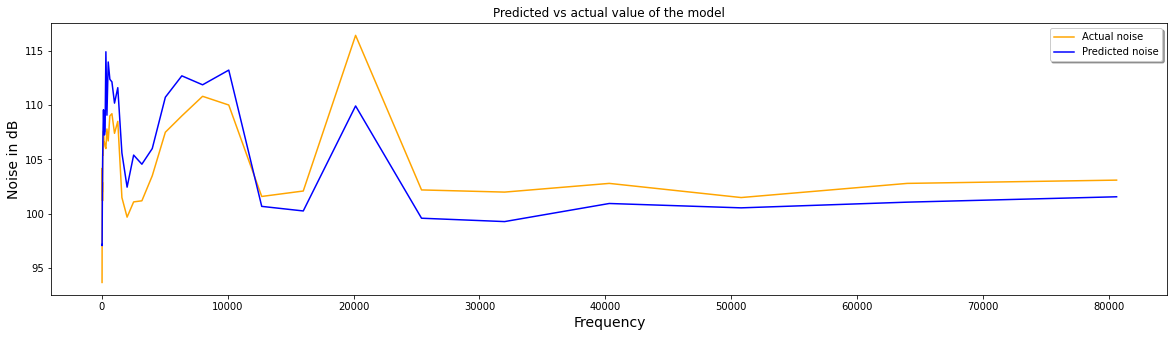

In [ ]:
from pylab import rcParams
plt.title('Predicted noise value [ YEAR 2015 ]', family='Arial', fontsize=18)
rcParams['figure.figsize'] = 20, 5
plt.xlabel('Frequency', family='Arial', fontsize=14)
plt.ylabel('Noise in dB', family='Arial', fontsize=14)
plt.plot(df['Actual Noise(dB)'], color='orange',label='Actual noise')
plt.plot(df['Predicted Noise(dB)'], color = 'blue',label='Predicted noise')
plt.legend(shadow=True)
plt.title('Predicted vs actual value of the model', family='Arial', fontsize=12)